# Indoor Semantic Image Segmentation

**Notebook created in PyTorch by [ Xavier Riera, Albert Mestre, José Javier Gómez] for the [UPC School](https://www.talent.upc.edu/ing/estudis/formacio/curs/310400/postgraduate-course-artificial-intelligence-deep-learning/) (2020).**



##Download and inspect the data
The dataset can be found in the following links :

*   NYU Depth Dataset V2 : [download link](https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html)



# Inicialization

We will start with the imports

In [ ]:
from google.colab import drive
import h5py
from scipy.io import loadmat
import numpy as np

We will start mounting Google Drive. We need to access to the files *.mat* where are the original data from the dataset.


In [ ]:
drive.mount('/content/drive/')

/bin/bash: pipenv: command not found
Mounted at /content/drive/


#####**Hint**


You can terminate the session in *Runtime -> manage session*. That should do the work and you can remount the drive again.

## Defining the localizations of the files

In [ ]:
#DIRECTORY
directory = 'drive/My Drive/Compartida con Albert/'

#PROJECT_PATH
PROJECT_PATH = directory + 'Google Colabs/'

#NYU DATASET
dir_dataset = directory + 'nyu_depth_v2_labeled.mat'

# SPLITS
dir_split =  directory + 'splits.mat'


## Accessing files

In [ ]:
file = h5py.File(dir_dataset, 'r')
officialSplit = loadmat(dir_split)

## Defining the Files-parameters

###We now define the filesparameters that are going to be used throughout the notebook to manipulate images files.

In [ ]:
# FPARAMS
fparams = {   'imagePath': directory + 'Images/',
}

####Parameters dataset

In [ ]:
 fparams.update({   
    
    'Directorio': dir_dataset,
    'images': file['images'],
    'labels': file['labels'],
    'names': file['names'],
    'namesToIds': file['namesToIds'],
    'scenes': file['scenes'], 
    'mapping_40_classes_path': directory + 'nyuv2_amm/classMapping40.mat',
    'mapping_13_classes_path': directory + 'nyuv2_amm/class13Mapping.mat',

    # OFICIAL SPLITS TRAIN & TEST    
    'trainOfficial': np.asarray(officialSplit['trainNdxs']).squeeze(),
    'testOfficial': np.asarray(officialSplit['testNdxs']).squeeze(),

 })

####Parameters csv

In [ ]:
fparams.update ({
    
   # CSV
    'CSVTrain': 'train.csv',
    'CSVTest': 'test.csv',
    'CSVValidation': 'validation.csv',

    'CSVTitle' : {
        'Image' : 'Image',
        'Label' : 'Label',
    },


    # PATTERNS
    'train': 'train',
    'test': 'test',
    'validation': 'validation',
    'label': 'label',
})

## Global Variables

In [ ]:
images = np.asarray(file['images']) 
labels = np.asarray(file['labels'])

#Mapping to 40/13 class configuration

#### We are going to reduce the number of category labels. From 894 categories to 40 categories. Later we will reduce from 40 categories to 13 categories.

Ref:

https://cs.nyu.edu/~deigen/dnl/


https://github.com/ankurhanda/SceneNetv1.0/


In [ ]:
mapping_file = loadmat(fparams['mapping_40_classes_path'])
className_40 = np.asarray(mapping_file['className']).squeeze()
className_40 = [clas[0] for clas in className_40]

mapping_894_to_40 = mapping_file['mapClass'].squeeze()

#insert category 0 == other category
mapping_894_to_40 = np.insert(mapping_894_to_40, 0, 0)


mapping_file = loadmat(fparams['mapping_13_classes_path'])
class_name_13 = mapping_file['classMapping13'][0][0][1][0]
class_name_13 =  [clas[0] for clas in class_name_13]

mapping_40_to_13 = mapping_file['classMapping13'][0][0][0][0]

#insert category 0 == other category
mapping_40_to_13 = np.insert(mapping_40_to_13, 0, 0)

In [ ]:
#Shift labels to -1 : we move category  0 to 255th position
shiftLabel = np.array([255, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

#Changing color Dictionary

##Dictionaries

###13 Categories labels to RGB : Convert_Label13_to_RGB

In [ ]:
#Variables to show labels as Images
Convert_Label13_to_RGB = {
    0: np.array([0, 0, 1]),
    1: np.array([0.9137, 0.3490, 0.1882]),
    2: np.array([0, 0.8549, 0]),
    3: np.array([0.5843, 0, 0.9412]),
    4: np.array([0.8706, 0.9451, 0.0941]),
    5: np.array([1.0000, 0.8078, 0.8078]),
    6: np.array([0, 0.8784, 0.8980]),
    7: np.array([0.4157, 0.5333, 0.8000]),
    8: np.array([0.4588, 0.1137, 0.1608]),
    9: np.array([0.9412, 0.1373, 0.9216]),
    10: np.array([0, 0.6549, 0.6118]),
    11: np.array([0.9765, 0.5451, 0]),
    12: np.array([0.8824, 0.8980, 0.7608]),
    #other values
    13: np.array([0, 0, 0]),
}
Convert_Diccionary13 = list(Convert_Label13_to_RGB.items())
Array_Colors_13 = np.array([item[1] for item in Convert_Diccionary13])

Color vs Meaning:

https://docs.google.com/spreadsheets/d/12LMGdwOMU_5dGKDGDEQaZWoj2xYNEL3FURyIB4R36s0/edit#gid=0

#Split the Dataset

It's time to split the data set in the training split, validation split, and test split. This data will be used to train our neural network later.

OFICIAL SPLITS TRAIN & TEST, are the 'index' that inidcates which data would be 'training' and which data would be 'test'. Beeing data a pair image - label.

##xTrain, yTrain

Here we are going to build two arrays : *xTrain*, *yTrain*, with *images* and *labels* indicated at *trainOfficial*.


In [ ]:
xTrain1 = []
yTrain1 = []

for i in np.asarray(fparams['trainOfficial']):
  xTrain1.append(images[i-1])S
  yTrain1.append(labels[i-1])

xTrain1 = np.asarray(xTrain1)
yTrain1 = np.asarray(yTrain1)

## xTest, yTest

Here we are going to build two arrays : *xTest*, *yTest*, with *images* and *labels* indicated at *testOfficial*.

In [ ]:
xTest = []
yTest = []

for i in np.asarray(fparams['testOfficial']):
  xTest.append(images[i-1])
  yTest.append(labels[i-1])

xTest = np.asarray(xTest)
yTest = np.asarray(yTest)

##Validation

Convert the train data into train & validation with 80/20 relation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xTrain, xValidation, yTrain, yValidation = train_test_split(
    xTrain1, 
    yTrain1, 
    test_size = 0.2)

#Transform 894 labels to 40 labels
yTrain40 = mapping_894_to_40[yTrain]
yTest40 = mapping_894_to_40[yTest]
yValidation40 = mapping_894_to_40[yValidation]

#Transform labels40 to labels13
yTrain13 = mapping_40_to_13[yTrain40]
yTest13 = mapping_40_to_13[yTest40]
yValidation13 = mapping_40_to_13[yValidation40]

In [ ]:
#Apply shift label : we move category  0 to 255th position in the labels
yTrain13 = shiftLabel[yTrain13]
yTest13 = shiftLabel[yTest13]
yValidation13 = shiftLabel[yValidation13]

#Save the images in a file .png format



In [ ]:
import skimage.io as io
import skimage.util as util
import csv


Global Variables

In [ ]:
SAVE_IMAGES = False

We are going to iterate all the images and labels (13 label categories) and save them.

### Training


In [ ]:
CSVTrain = []
NUM_SAMPLES = xTrain.shape[0]

for i in range(NUM_SAMPLES): 
  
  if(SAVE_IMAGES) : 
    path = fparams['imagePath'] + str(i) + '_' + fparams['train'] + '.png'
    io.imsave(path,xTrain[i].transpose())
  
    path = fparams['imagePath'] + str(i) + '_' + fparams['train'] + '_' + fparams['label'] + '.png'
    io.imsave(path,yTrain13[i].transpose())
  
  CSVTrain.insert( len(CSVTrain), [str(i) + '_' + fparams['train'] + '.png', str(i) + '_' + fparams['train'] + '_' + fparams['label'] + '.png'] )


After the execution, we create the csv file

In [ ]:
with open( fparams['imagePath'] + fparams['CSVTrain'], 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow( [fparams['CSVTitle']['Image'], fparams['CSVTitle']['Label']] )
    writer.writerows(CSVTrain)

In [ ]:
CSVTrain = []

### Test

In [ ]:
CSVTest = []
NUM_SAMPLES = xTest.shape[0]

for i in range(NUM_SAMPLES): 
  
  if(SAVE_IMAGES) : 
    path = fparams['imagePath'] + str(i) + '_' + fparams['test'] + '.png'
    io.imsave(path,xTest[i].transpose())
  
    path = fparams['imagePath'] + str(i) + '_' + fparams['test'] + '_' + fparams['label'] + '.png'
    io.imsave(path,yTest13[i].transpose())
  
  CSVTest.insert( len(CSVTest), [str(i) + '_' + fparams['test'] + '.png', str(i) + '_' + fparams['test'] + '_' + fparams['label'] + '.png'] )


After the execution, we create the csv file

In [ ]:
with open( fparams['imagePath'] + fparams['CSVTest'], 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow( [fparams['CSVTitle']['Image'], fparams['CSVTitle']['Label']] )
    writer.writerows(CSVTest)

In [ ]:
CSVTest=[]

###Validation

In [ ]:
CSVValidation = []
NUM_SAMPLES = xValidation.shape[0]

for i in range(NUM_SAMPLES): 
  
  if(SAVE_IMAGES) : 
    path = fparams['imagePath'] + str(i) + '_' + fparams['validation'] + '.png'
    io.imsave(path,xValidation[i].transpose())
  
    path = fparams['imagePath'] + str(i) + '_' + fparams['validation'] + '_' + fparams['label'] + '.png'
    io.imsave(path,yValidation13[i].transpose())
  
  CSVValidation.insert( len(CSVValidation), [str(i) + '_' + fparams['validation'] + '.png', str(i) + '_' + fparams['validation'] + '_' + fparams['label'] + '.png'] )


After the execution, we create the csv file

In [ ]:
with open( fparams['imagePath'] + fparams['CSVValidation'], 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow( [fparams['CSVTitle']['Image'], fparams['CSVTitle']['Label']] )
    writer.writerows(CSVValidation)

In [ ]:
CSVValidation = []

#Dataset histogram

Before going further, let's inspect and analyse our Dataset. Let's see if all categories are equaly represented in number of samples.

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

###Train

In [ ]:
LabelVectorTrain = []

for i in range(yTrain40.shape[0]):
  imgLabels = yTrain40[i].ravel()
  LabelVectorTrain.append(imgLabels)

ArrayLabelTrain = np.asarray(LabelVectorTrain)


###Test

In [ ]:
LabelVectorTest = []

for i in range(xTest.shape[0]):
  imgLabels = yTest40[i].ravel()
  LabelVectorTest.append(imgLabels)

ArrayLabelTest = np.asarray(LabelVectorTest)

###Validation


In [ ]:
LabelVectorValidation = []

for i in range(yValidation40.shape[0]):
  imgLabels = yValidation40[i].ravel()
  LabelVectorValidation.append(imgLabels)
  
ArrayLabelValidation = np.asarray(LabelVectorValidation)

###Plot histogram

In [ ]:
#bins seems to be the content
bins = np.arange(0,41,1)

#labels = ['No Label','Wall','Floor','Cabinet','Bed','Chair','Sofa','Table','Door','Window','BookShelf','Picture','Counter','Blinds','Desks','Shelves','Curtain','Dresser','Pillow','Mirror','Floor-mat','Clothes','Ceiling','Books','Refrigerator','Television','Paper','Towel','Shower-curtain','Box','Whiteboard','Person','NightStand','Toilet','Sink','Lamp','Bathtub','Bag','Other-structure','Other-furniture','Other-prop']
labels = ['No label'] + className_40

#Bars positions
positions = np.arange(0.5,41.5,1)

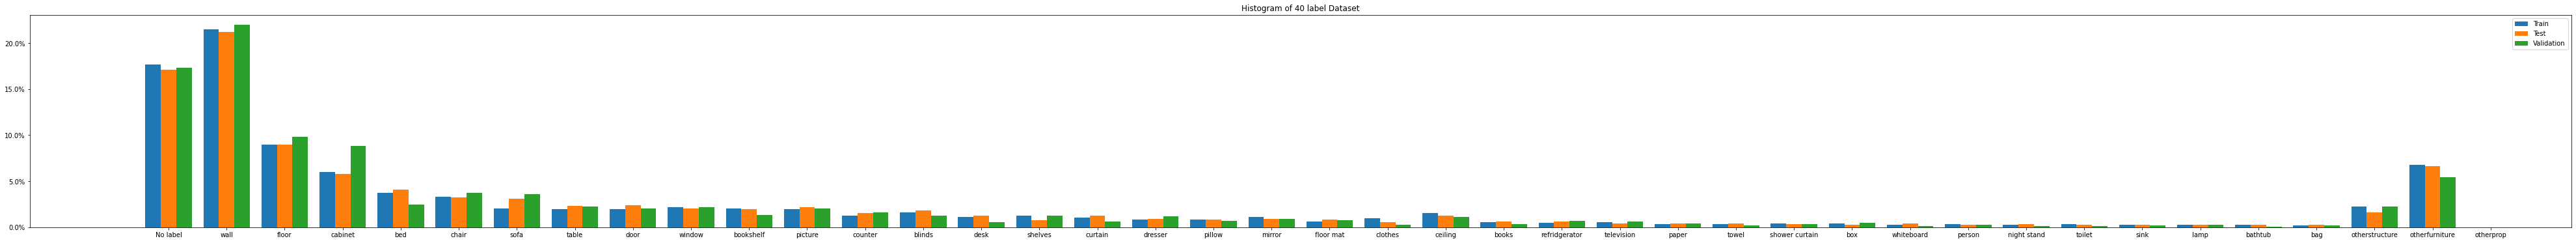

In [ ]:
plt.figure(figsize=(70,6))
plt.title('Histogram of 40 label Dataset')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(ticks = positions, labels= labels)

#will be shown 3 bars histograms (train, test, validation) in paralel
plt.hist([ArrayLabelTrain.ravel(), ArrayLabelTest.ravel(), ArrayLabelValidation.ravel() ] ,label=['Train','Test', 'Validation'] , bins=bins, density = True)
plt.legend()


##13


Histograma of the 13 categories labels

###Train Labels


In [ ]:
LabelVectorTrain = []

for i in range(xTrain.shape[0]):
  imgLabels = yTrain13[i].transpose().ravel()
  LabelVectorTrain.append(imgLabels)

ArrayLabelTrain = np.asarray(LabelVectorTrain)

###Test Labels

In [ ]:
LabelVectorTest = []

for i in range(xTest.shape[0]):
  imgLabels = yTest13[i].transpose().ravel()
  LabelVectorTest.append(imgLabels)

ArrayLabelTest = np.asarray(LabelVectorTest)

###Validation Labels


In [ ]:
LabelVectorValidation = []

for i in range(yValidation13.shape[0]):
  imgLabels = yValidation13[i].ravel()
  LabelVectorValidation.append(imgLabels)

ArrayLabelValidation = np.asarray(LabelVectorValidation)

###Plot histogram


In [ ]:
from matplotlib.ticker import PercentFormatter

In [ ]:
#bins seems to be the content
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#labels = ['No label','Bed','Book','Ceil','Chair','Floor','Furn','Objs','Paint','Sofa','Table','TV','Wall','Wind']
labels = ['No label'] + class_name_13

#Bars positions
positions = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5]


In [ ]:
plt.figure(figsize=(18,6))
plt.title('Histogram of 13 label Dataset')
#plt.ylabel('Percentage of píxels on the dataset that pertains that class')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(ticks = positions, labels= labels)

#will be shown 3 bars histograms (train, test, validation) in paralel
plt.hist([ArrayLabelTrain.ravel(), ArrayLabelTest.ravel(), ArrayLabelValidation.ravel() ] ,label=['Train','Test', 'Validation'] , bins=bins, density = True)
plt.legend()
